# Project Oxford: Computer Vision API example

### This Jupyter notebook shows you how to get started with the Project Oxford <b>Computer Vision API</b> in Python, and how to visualize your results.

To use this notebook, you will need to get keys to <b>Computer Vision API</b>. Visit <a href="http://www.projectoxford.ai/vision">www.projectoxford.ai/vision</a>, and then the “Try for free” button. On the “Sign in” page, use your Microsoft account to sign in and you will be able to subscribe to Computer Vision API and get free keys (Code of Conduct and TOS). After completing the sign-up process, paste your key into the variables section below. (Either the primary or the secondary key works.)

In [2]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [3]:
# Variables

_url = 'https://api.projectoxford.ai/vision/v1.0/analyze'
_key = "983f4ed9412d4b88b59e6ccb4a1eb9d2"
_maxNumRetries = 10

In [4]:
# The list of vision API features
visualFeaturesList = ['ImageType', 'Faces', 'Adult', 'Categories', 'Color', 'Tags', 'Descriptions']

## Helper functions

In [154]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [155]:
def url2image(image_url):
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( image_url ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )
    return img

In [156]:
def file2image(image_path):
    arr = cv2.imread(image_path)
    img = cv2.cvtColor(arr,cv2.COLOR_BGR2RGB)
    return img

In [6]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )

    if 'categories' in result:
        categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
        cv2.putText( img, categoryName, (30,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3 )

In [157]:
def get_api_results_from_url(urlImage,visualFeatures):
    featureString = ",".join(visualFeatures)
    #Computer Vision Parameters
    params = { 'visualFeatures' : featureString} 

    headers = dict()
    headers['Ocp-Apim-Subscription-Key'] = _key
    headers['Content-Type'] = 'application/json' 
    json = { 'url': urlImage } 
    data = None

    result = processRequest( json, data, headers, params )
    return result

In [158]:
def get_api_results_from_file(filePath,visualFeatures):
    # Load raw image file into memory
    with open( filePath, 'rb' ) as f:
        data = f.read()
    featuresString = ",".join(visualFeatures)
    # Computer Vision parameters
    params = { 'visualFeatures' : featuresString} 

    headers = dict()
    headers['Ocp-Apim-Subscription-Key'] = _key
    headers['Content-Type'] = 'application/octet-stream'
    json = None
    result = processRequest( json, data, headers, params )
    return result
    

## List of Image Attributes
* ImageType
* Faces
* Categories
* Tags
* Color
* Description
* Adult

## Extracting Attributes with an Image URL

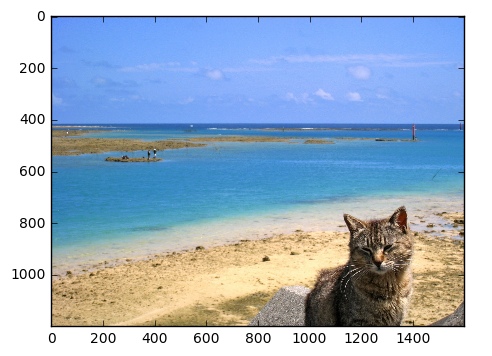

In [159]:
image_url = 'http://oahuspca.com/wp-content/uploads/2014/10/Beach-Cat-F.jpg'
img = url2image(image_url)
plt.imshow(img)
    

In [160]:
result = get_api_results_from_url(image_url,['Tags'])
print(result)

{u'metadata': {u'width': 1600, u'format': u'Jpeg', u'height': 1200}, u'requestId': u'e6539504-32fa-432a-8c02-6057898681b4', u'tags': [{u'confidence': 0.9896512031555176, u'name': u'outdoor'}, {u'confidence': 0.9839696884155273, u'name': u'water'}, {u'confidence': 0.982355535030365, u'name': u'ground'}, {u'confidence': 0.9596864581108093, u'name': u'cat'}, {u'confidence': 0.7582242488861084, u'name': u'shore'}, {u'confidence': 0.6814596652984619, u'name': u'nature'}, {u'confidence': 0.14437206089496613, u'name': u'sandy'}]}


In [161]:
for tag_attr in result['tags']:
    print(tag_attr['name'])

outdoor
water
ground
cat
shore
nature
sandy


## Extracting Attributes with a Local File

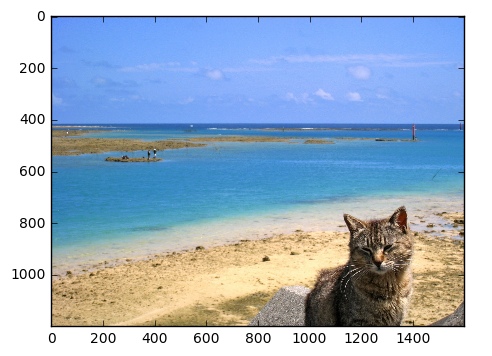

In [162]:
image_path='/Users/kaboakye/Desktop/Beach-Cat-F.jpg'
img = file2image(image_path)
plt.imshow(img)

In [163]:
result = get_api_results_from_file(image_path,['Tags'])
print(result)

{u'metadata': {u'width': 1600, u'format': u'Jpeg', u'height': 1200}, u'requestId': u'434c21c1-f6d6-40f3-a4d8-e8c26d0626af', u'tags': [{u'confidence': 0.9896512031555176, u'name': u'outdoor'}, {u'confidence': 0.9839696884155273, u'name': u'water'}, {u'confidence': 0.982355535030365, u'name': u'ground'}, {u'confidence': 0.9596864581108093, u'name': u'cat'}, {u'confidence': 0.7582242488861084, u'name': u'shore'}, {u'confidence': 0.6814596652984619, u'name': u'nature'}, {u'confidence': 0.14437206089496613, u'name': u'sandy'}]}


In [165]:
tags = result['tags']
for tag in tags:
    print(tag['name'])

outdoor
water
ground
cat
shore
nature
sandy


## ImageType

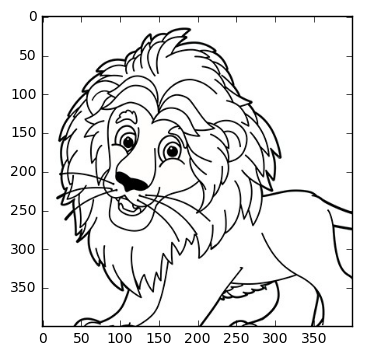

In [166]:
image_url = 'https://portalstoragewuprod.azureedge.net/vision/Analysis/5-1.jpg'
img = url2image(image_url)
plt.imshow(img)

In [167]:
result = get_api_results_from_url(image_url,['ImageType'])

In [168]:
print(result)

{u'requestId': u'd08392bd-302c-41d6-8cb3-7755242d9358', u'imageType': {u'clipArtType': 2, u'lineDrawingType': 1}, u'metadata': {u'width': 400, u'format': u'Jpeg', u'height': 400}}


## Faces

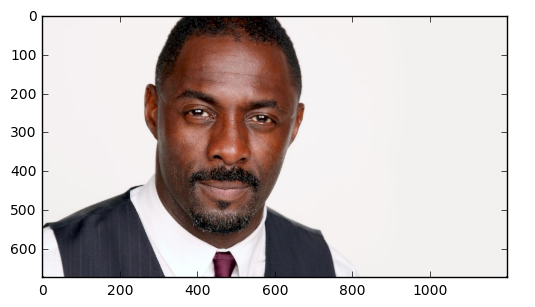

In [169]:
image_url = 'https://aboveaverage.com/wp-content/uploads/2015/09/1-BET.png'
img = url2image(image_url)
plt.imshow(img)

In [170]:
result = get_api_results_from_url(image_url,['Faces'])

In [171]:
print(result)

{u'faces': [{u'gender': u'Male', u'age': 39, u'faceRectangle': {u'width': 382, u'top': 150, u'height': 382, u'left': 286}}], u'requestId': u'3d561233-e3ad-4f2f-baa6-ca47b0b677b0', u'metadata': {u'width': 1200, u'format': u'Png', u'height': 675}}


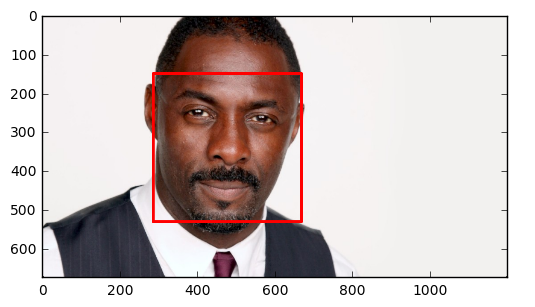

In [172]:
img = url2image(image_url)
for face in result['faces']:
    ulx = face['faceRectangle']['left']
    uly = face['faceRectangle']['top']
    brx = ulx + face['faceRectangle']['width']
    bry = uly + face['faceRectangle']['height']
    cv2.rectangle( img,(ulx,uly), (brx, bry), color = (255,0,0), thickness = 5 )
plt.imshow(img)    

## Categories & Tags

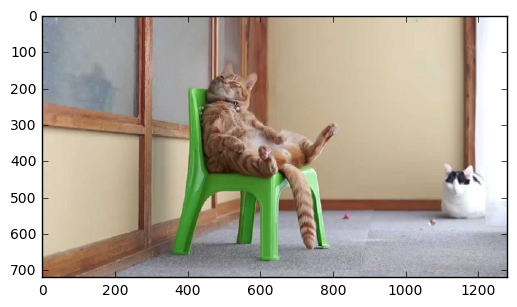

In [173]:
image_url = 'https://i.ytimg.com/vi/2IbGFzUC8gg/maxresdefault.jpg'
img = url2image(image_url)
plt.imshow(img)

In [175]:
result = get_api_results_from_url(image_url,['Categories', 'Tags'])
print(result)

{u'metadata': {u'width': 1280, u'format': u'Jpeg', u'height': 720}, u'requestId': u'db67814e-4775-4b84-a590-3f449a599643', u'categories': [{u'score': 0.7890625, u'name': u'animal_cat'}], u'tags': [{u'confidence': 0.9794538617134094, u'name': u'cat'}, {u'confidence': 0.9663872122764587, u'name': u'wall'}, {u'confidence': 0.955946683883667, u'name': u'sitting'}, {u'confidence': 0.919914186000824, u'name': u'indoor'}, {u'confidence': 0.8841764330863953, u'name': u'green'}]}


In [176]:
categories = result['categories']
for category in categories:
    print(category['name'])

animal_cat


In [177]:
tags = result['tags']
for tag in tags:
    print(tag['name'])

cat
wall
sitting
indoor
green


## Color

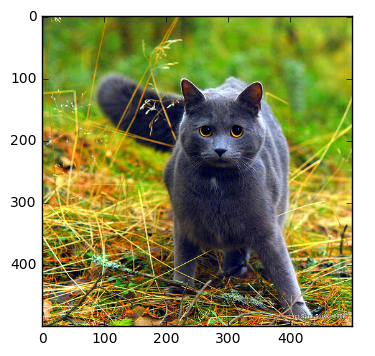

In [178]:
image_url = 'http://farm4.static.flickr.com/3224/3014800775_6d6726e3e0.jpg'
img = url2image(image_url)
plt.imshow(img)

In [179]:
result = get_api_results_from_url(image_url,['Color'])
print(result)

{u'color': {u'accentColor': u'AD7B1E', u'dominantColorForeground': u'Yellow', u'dominantColorBackground': u'Green', u'dominantColors': [u'Yellow', u'Green'], u'isBWImg': False}, u'requestId': u'40caf803-1bd6-44f6-8027-281a9f11d3af', u'metadata': {u'width': 500, u'format': u'Jpeg', u'height': 500}}


In [180]:
for color in result['color']['dominantColors']:
    print(color)

Yellow
Green


## Description

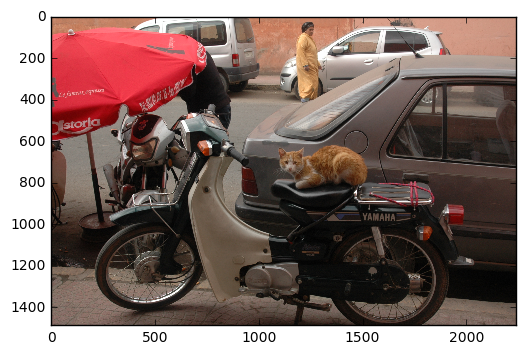

In [181]:
image_url = 'https://stephanieye.files.wordpress.com/2014/03/0080-pie-on-scooter.jpg'
img = url2image(image_url)
plt.imshow(img)

In [182]:
result = get_api_results_from_url(image_url,['Description'])
print(result)

{u'metadata': {u'width': 2240, u'format': u'Jpeg', u'height': 1488}, u'description': {u'captions': [{u'text': u'a motorcycle parked on the side of a car', u'confidence': 0.8714160523764006}], u'tags': [u'outdoor', u'car', u'motorcycle', u'parked', u'road', u'building', u'sitting', u'red', u'street', u'bicycle', u'parking', u'front', u'truck', u'sidewalk', u'standing', u'seat', u'side', u'lot', u'riding', u'old', u'woman', u'man', u'city', u'people', u'sign', u'group', u'white']}, u'requestId': u'30e01490-3634-47fd-bbfd-ea9cf9d67120'}


In [183]:
for caption in result['description']['captions']:
    print(caption['text'])

a motorcycle parked on the side of a car


In [184]:
tags = result['description']['tags']
for tag in tags:
    print(tag)

outdoor
car
motorcycle
parked
road
building
sitting
red
street
bicycle
parking
front
truck
sidewalk
standing
seat
side
lot
riding
old
woman
man
city
people
sign
group
white


So those are the basics! You can find more information about the API <a href="https://www.microsoft.com/cognitive-services/en-us/computer-vision-api">here</a>. You can also play around their testing console <a href="https://dev.projectoxford.ai/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa/console">here</a>.